In [477]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

data = pd.read_csv("/kaggle/input/challenge2222b/METABRIC_RNA_Mutation.csv", encoding="latin-1")
data 

/tmp/ipykernel_28/1758074801.py:6: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/challenge2222b/METABRIC_RNA_Mutation.csv", encoding="latin-1")


patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN             0   
1              Breast Invasive Ductal Carcinoma        High             0   
2              Breast Invasive Ductal Carcinoma        High             1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
...                                         ...         ...           ...   
1899          Breast Invasive Lobular Carcinoma        High             0   
1900           Breast Invasive Ductal Carcinoma        High             0   
1901           Breast Invasive Ductal Carcinoma        High             0   
1902           Breast Invasive Ductal Carcinoma    Moderate             0   
1903           Breast Invasive Ductal Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                    claudin-low     1.0                   Positve  ...   
1                           LumA     1.0                   Positve  ...   
2                           LumB     1.0                   Positve  ...   
3                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
1899                        LumA     4.0                   Positve  ...   
1900                        LumB     4.0                   Positve  ...   
1901                        LumB     4.0                   Positve  ...   
1902                        LumB     4.0                   Positve  ...   
1903                        LumB     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
0           0           0           0        0          0         0         0   
1           0           0           0        0          0         0         0   
2           0           0           0        0          0         0         0   
3           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1899        0           0           0        0          0         0         0   
1900        0           0           0        0          0         0         0   
1901        0           0           0        0          0         0         0   
1902        0           0           0        0          0         0         0   
1903        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
0              0         0          0  
1              0         0          0  
2              0         0          0  
3              0         0          0  
4              0         0          0  
...          ...       ...        ...  
1899          

In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


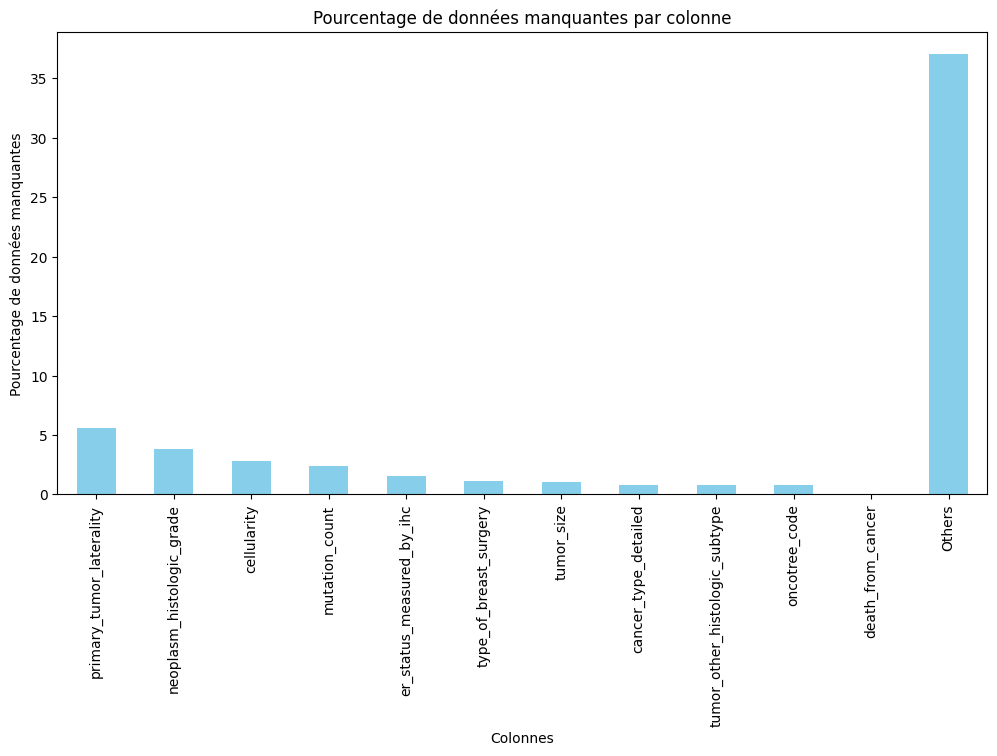

In [479]:
import matplotlib.pyplot as plt

# Calculer le pourcentage de données manquantes par colonne
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Définir un seuil pour regrouper les colonnes
threshold = 10  # Vous pouvez ajuster ce seuil en fonction de votre préférence

# Regrouper les colonnes en dessous du seuil
small_missing = missing_percent[missing_percent <= threshold]
small_missing['Others'] = missing_percent[missing_percent > threshold].sum()

# Créer un graphique en barres empilées
plt.figure(figsize=(12, 6))
small_missing.plot(kind='bar', color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de données manquantes')

plt.show()


# Correlations & data cleaning of the clinical features 

In [480]:
clinical_features_to_drop = data.columns[31:] 
clinical_data = data.drop(clinical_features_to_drop, axis=1)
clinical_data.head()

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  nottingham_prognostic_index  oncotree_code overall_survival_months  \
0                       6.044            IDC              140.500000   
1                       4.020            IDC               84.633333   
2                       4.030            IDC              163.700000   
3                       4.050           MDLC              164.933333   
4                       6.080           MDLC               41.366667   

  overall_survival pr_status  radio_therapy 3-gene_classifier_subtype  \
0                1  Negative              1                 ER-/HER2-   
1                1  Positive              1     ER+/HER2- High Prolif   
2                0  Positive              0                       NaN   
3                1  Positive              1                       NaN   
4                0  Positive              1     ER+/HER2- High Prolif   

  tumor_size tumor_stage  death_from_cancer  
0       22.0         2.0             Living  
1       10.0         1.0             Living  
2       15.0         2.0    Died of Disease  
3       25.0         2.0             Living  
4       40.0         2.0    Died of Disease  

[5 rows x 31 columns]

In [481]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

> **There is no null value on the clinical sub dataset, we can start the visualisation**

In [482]:
died = clinical_data[clinical_data['overall_survival']==0]
survived = clinical_data[clinical_data['overall_survival']==1]

alive = clinical_data[clinical_data['death_from_cancer']=='Living']
died_cancer = clinical_data[clinical_data['death_from_cancer']=='Died of Disease']
died_not_cancer = clinical_data[clinical_data['death_from_cancer']=='Died of Other Causes']
color="Spectral"

> **Created sous dataset of the clinical dataset, including only certaines lignes qui remplissent un critere, pour la visualisation** 

/tmp/ipykernel_28/3533785135.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clinical_data[col][clinical_data['overall_survival'] == 1], color='purple', label='survived', ax=ax)
/tmp/ipykernel_28/3533785135.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clinical_data[col][clinical_dat

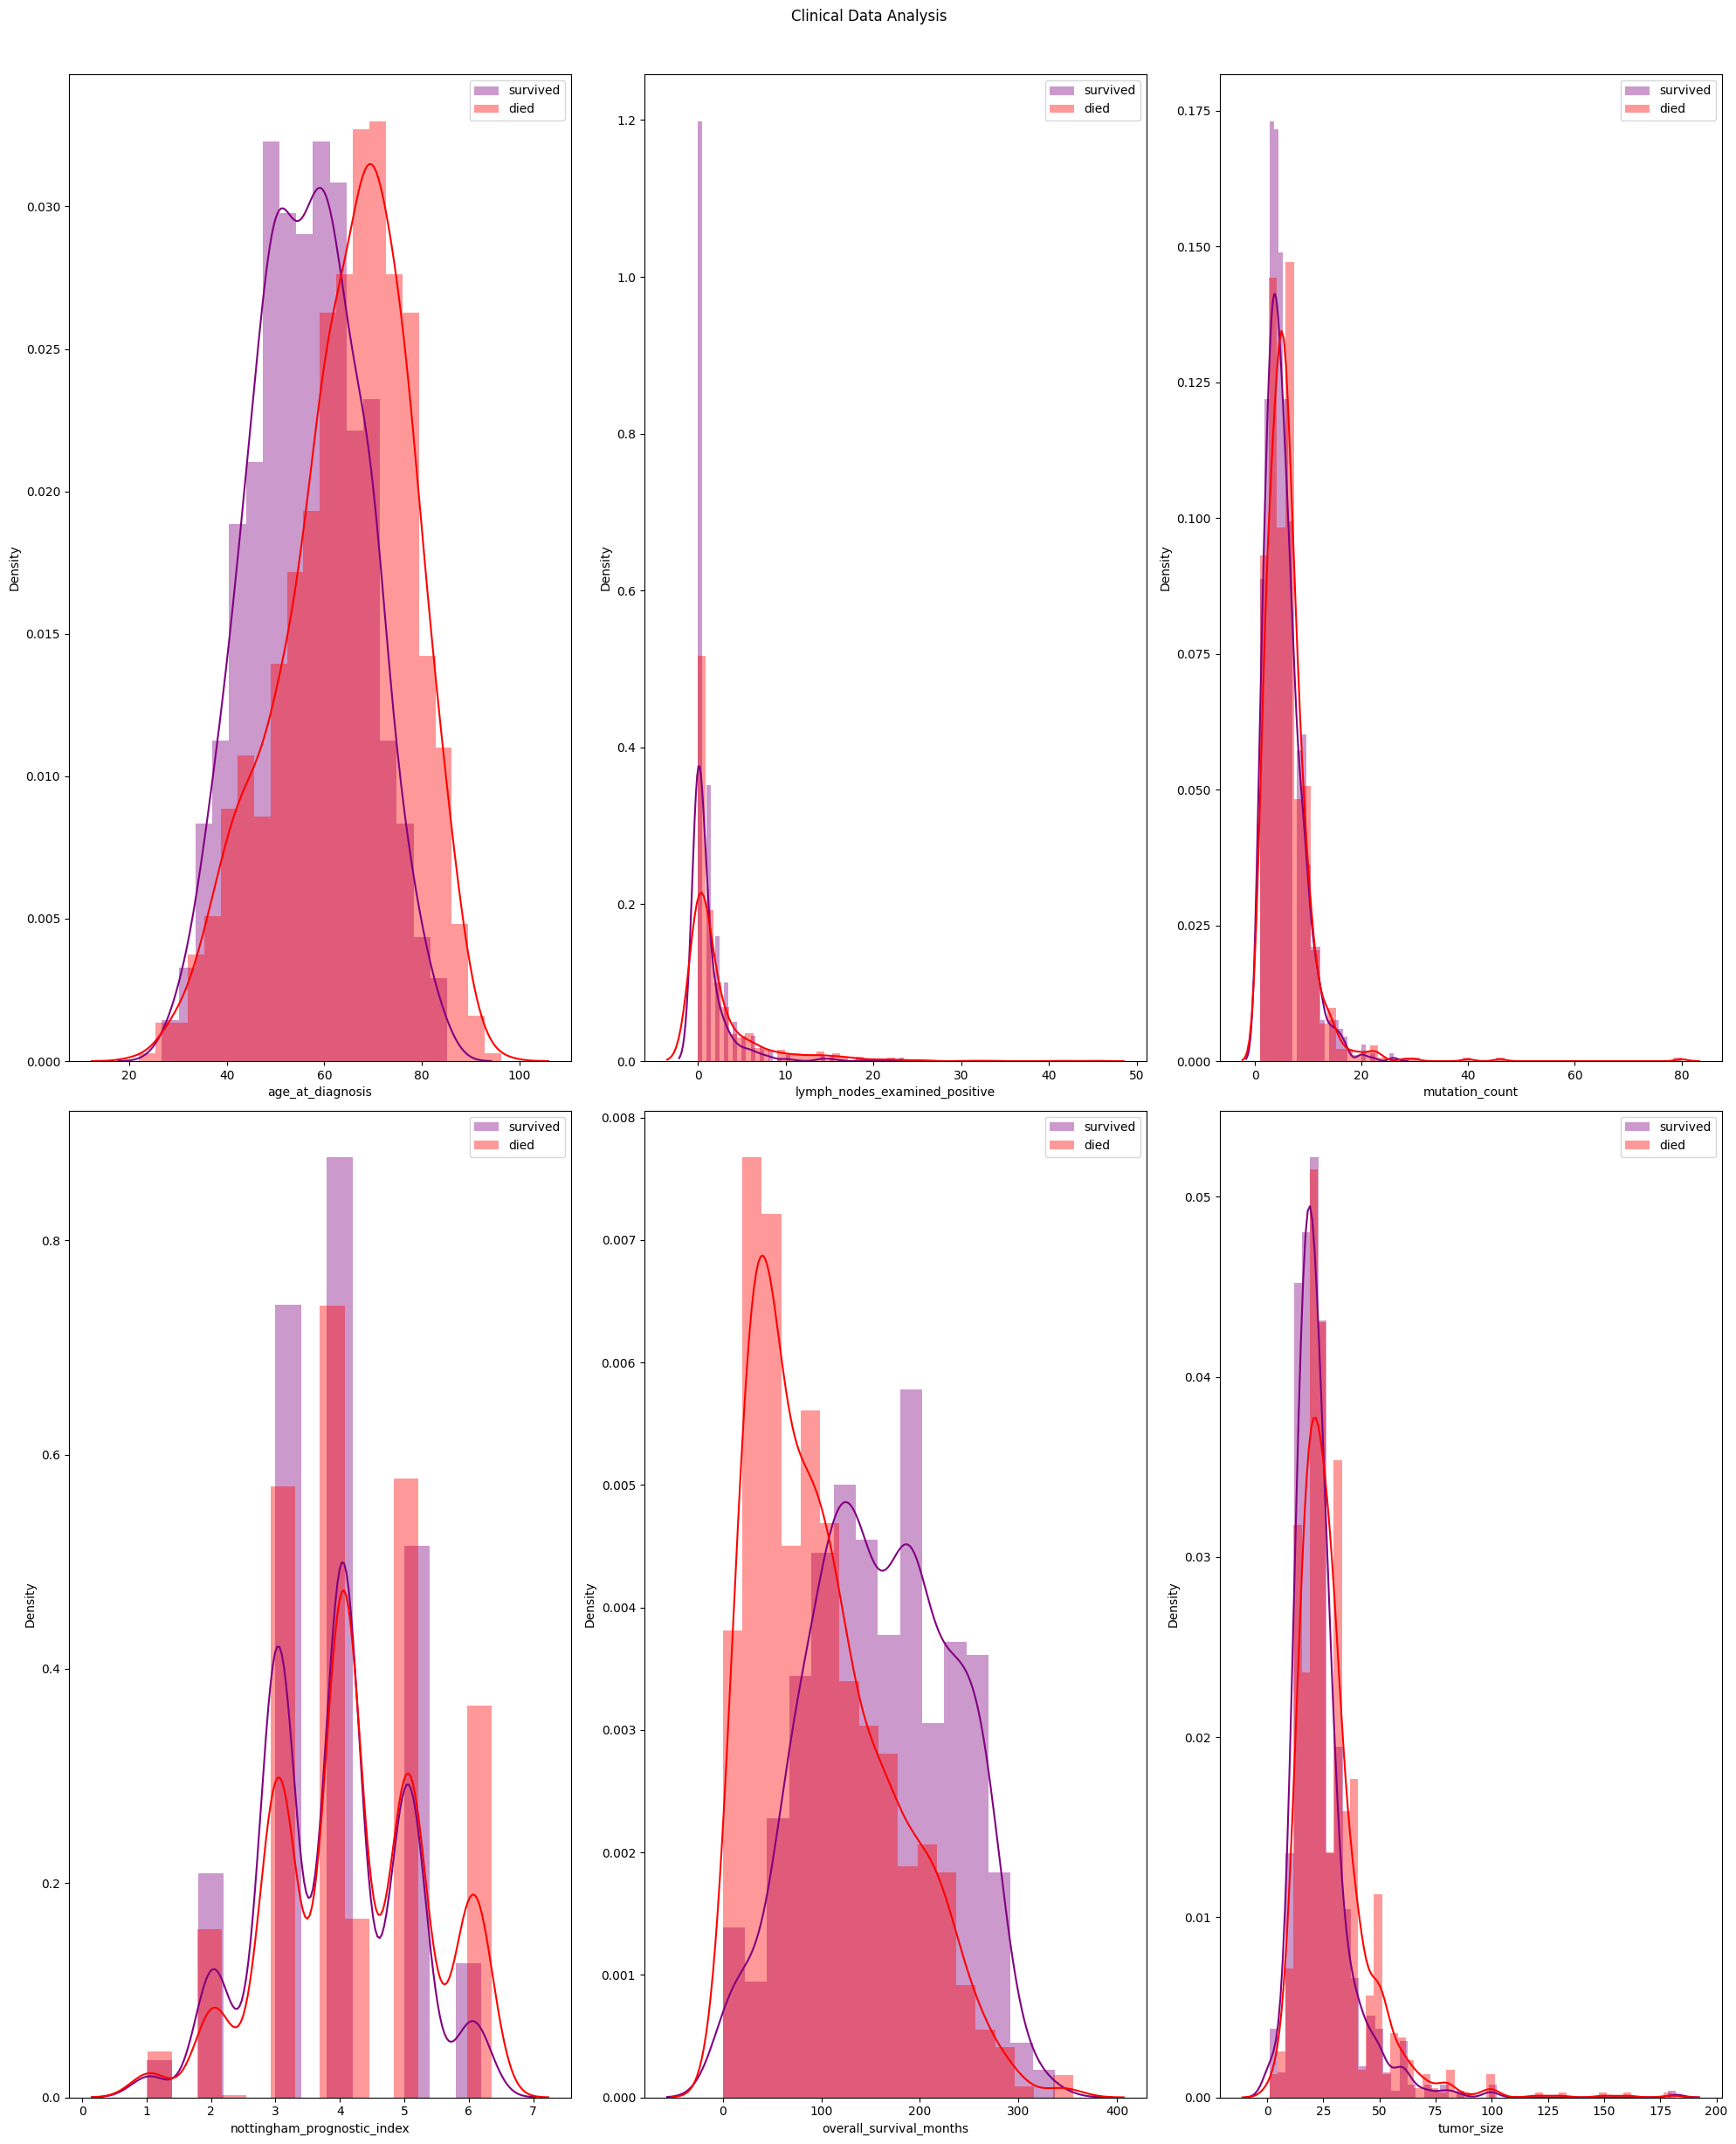

In [483]:
import matplotlib.pyplot as plt
import seaborn as sns

num_clinical_columns = ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']

# Création d'une seule figure avec un nombre de sous-graphiques automatiquement calculé
num_subplots = len(num_clinical_columns)
fig, axes = plt.subplots(2, num_subplots // 2 + num_subplots % 2, figsize=(20, 25))
fig.suptitle('Clinical Data Analysis')

# Utilisation de la fonction zip pour itérer à la fois sur les colonnes et les axes
for col, ax in zip(num_clinical_columns, axes.flat):
    sns.distplot(clinical_data[col][clinical_data['overall_survival'] == 1], color='purple', label='survived', ax=ax)
    sns.distplot(clinical_data[col][clinical_data['overall_survival'] == 0], color='r', label='died', ax=ax)
    ax.legend(loc='best')

# Ajustement de la disposition des sous-graphiques
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

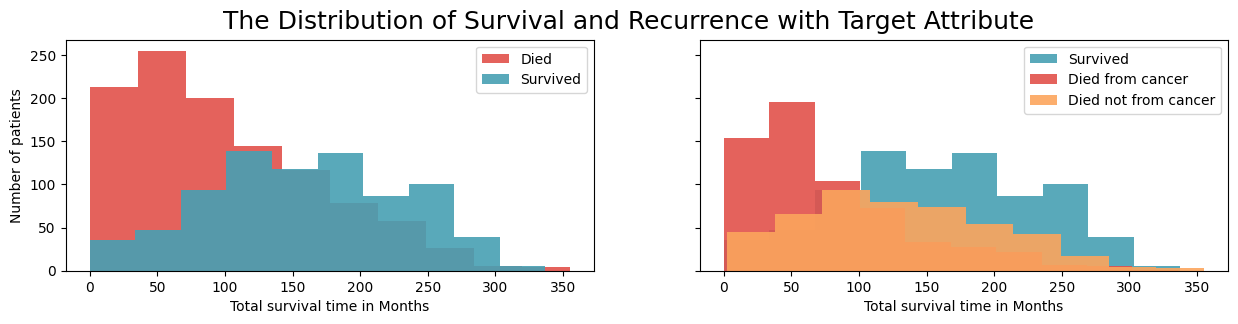

In [484]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].hist(died['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[0].hist(survived['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].legend()

ax[1].hist(alive['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[1].legend()

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Total survival time in Months')
ax[1].set_ylabel('')

plt.show()

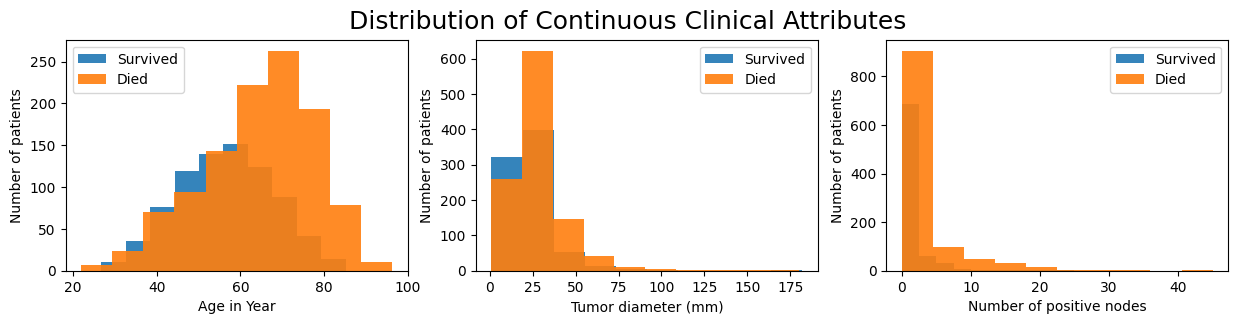

In [485]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 3))
fig.suptitle('Distribution of Continuous Clinical Attributes', fontsize=18)

attributes = ['age_at_diagnosis', 'tumor_size', 'lymph_nodes_examined_positive']
labels = ['Age in Year', 'Tumor diameter (mm)', 'Number of positive nodes']

for i, attr in enumerate(attributes):
    ax[i].hist(survived[attr], alpha=0.9, label='Survived')
    ax[i].hist(died[attr], alpha=0.9, label='Died')
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel('Number of patients')
    ax[i].legend()

plt.show()


In [486]:
data

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN             0   
1              Breast Invasive Ductal Carcinoma        High             0   
2              Breast Invasive Ductal Carcinoma        High             1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
...                                         ...         ...           ...   
1899          Breast Invasive Lobular Carcinoma        High             0   
1900           Breast Invasive Ductal Carcinoma        High             0   
1901           Breast Invasive Ductal Carcinoma        High             0   
1902           Breast Invasive Ductal Carcinoma    Moderate             0   
1903           Breast Invasive Ductal Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                    claudin-low     1.0                   Positve  ...   
1                           LumA     1.0                   Positve  ...   
2                           LumB     1.0                   Positve  ...   
3                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
1899                        LumA     4.0                   Positve  ...   
1900                        LumB     4.0                   Positve  ...   
1901                        LumB     4.0                   Positve  ...   
1902                        LumB     4.0                   Positve  ...   
1903                        LumB     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
0           0           0           0        0          0         0         0   
1           0           0           0        0          0         0         0   
2           0           0           0        0          0         0         0   
3           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1899        0           0           0        0          0         0         0   
1900        0           0           0        0          0         0         0   
1901        0           0           0        0          0         0         0   
1902        0           0           0        0          0         0         0   
1903        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
0              0         0          0  
1              0         0          0  
2              0         0          0  
3              0         0          0  
4              0         0          0  
...          ...       ...        ...  
1899          

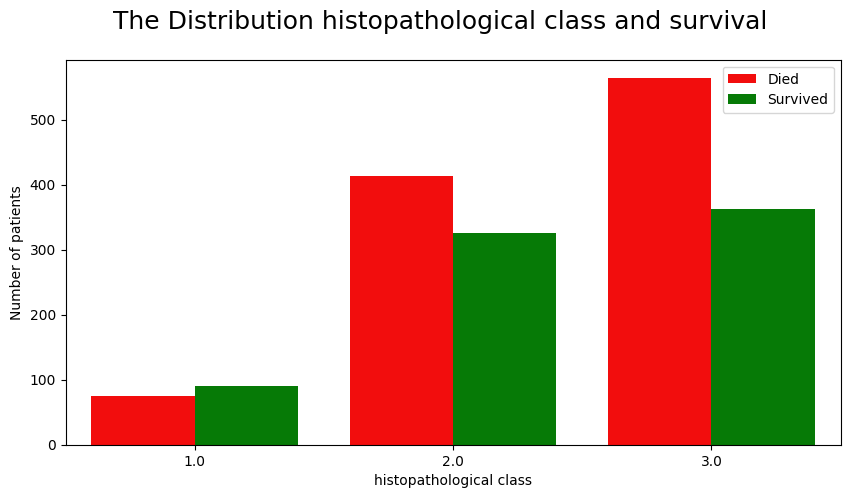

In [487]:
fig, ax = plt.subplots( figsize=(10,5))
fig.suptitle('The Distribution histopathological class and survival', fontsize = 18)

sns.countplot(x='neoplasm_histologic_grade', hue='overall_survival' ,data = clinical_data, palette=('red', 'green') , ax=ax, saturation=0.90)
ax.legend([ 'Died', 'Survived'])

ax.set_xlabel('histopathological class')
ax.set_ylabel('Number of patients')

plt.show()

 > **The 2 and 3 type of hispatological class has a higher dying number of patients than the 1 class**

In [488]:
clinical_data.neoplasm_histologic_grade #pour rappler cet attribut prend ces valeurs NUM entre 0 

0       3.0
1       3.0
2       2.0
3       2.0
4       3.0
       ... 
1899    3.0
1900    3.0
1901    3.0
1902    2.0
1903    3.0
Name: neoplasm_histologic_grade, Length: 1904, dtype: float64

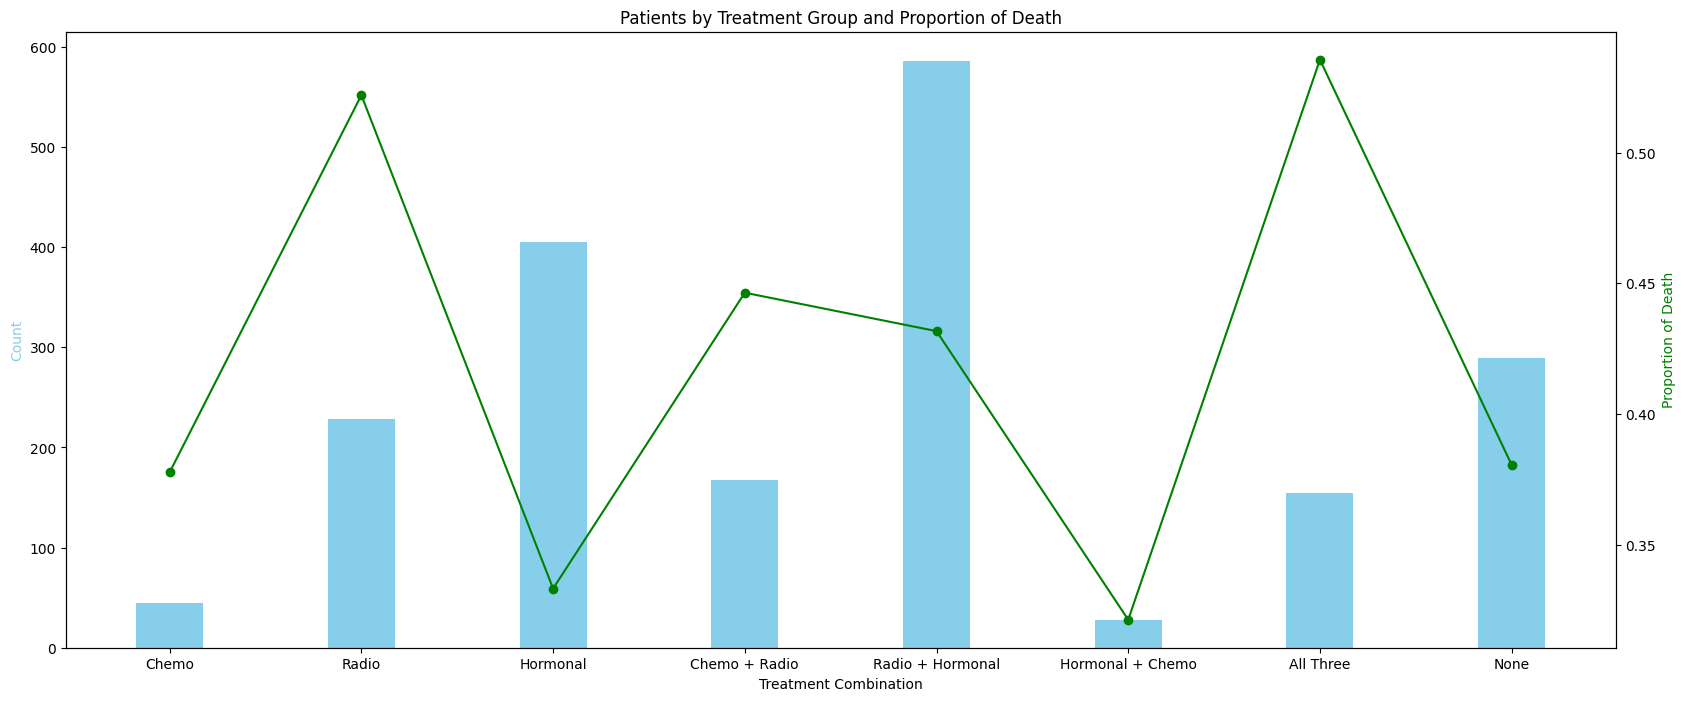

In [489]:
import matplotlib.pyplot as plt
import pandas as pd

# Définir les conditions pour chaque sous-ensemble de traitement
chemo_condition = (clinical_data["chemotherapy"] == True) & (clinical_data["radio_therapy"] == False) & (clinical_data["hormone_therapy"] == False)
radio_condition = (clinical_data["chemotherapy"] == False) & (clinical_data["radio_therapy"] == True) & (clinical_data["hormone_therapy"] == False)
hormonal_condition = (clinical_data["chemotherapy"] == False) & (clinical_data["radio_therapy"] == False) & (clinical_data["hormone_therapy"] == True)
chemo_radio_condition = (clinical_data["chemotherapy"] == True) & (clinical_data["radio_therapy"] == True) & (clinical_data["hormone_therapy"] == False)
radio_hormonal_condition = (clinical_data["chemotherapy"] == False) & (clinical_data["radio_therapy"] == True) & (clinical_data["hormone_therapy"] == True)
hormonal_chemo_condition = (clinical_data["chemotherapy"] == True) & (clinical_data["radio_therapy"] == False) & (clinical_data["hormone_therapy"] == True)
all_3_condition = (clinical_data["chemotherapy"] == True) & (clinical_data["radio_therapy"] == True) & (clinical_data["hormone_therapy"] == True)
no_treatment_condition = (clinical_data["chemotherapy"] == False) & (clinical_data["radio_therapy"] == False) & (clinical_data["hormone_therapy"] == False)

# Créer un DataFrame avec des sous-ensembles pour chaque combinaison de traitements
treatment_data = pd.DataFrame({
    'Treatment Combination': ['Chemo', 'Radio', 'Hormonal', 'Chemo + Radio', 'Radio + Hormonal', 'Hormonal + Chemo', 'All Three', 'None'],
    'Count': [
        clinical_data[chemo_condition].shape[0],
        clinical_data[radio_condition].shape[0],
        clinical_data[hormonal_condition].shape[0],
        clinical_data[chemo_radio_condition].shape[0],
        clinical_data[radio_hormonal_condition].shape[0],
        clinical_data[hormonal_chemo_condition].shape[0],
        clinical_data[all_3_condition].shape[0],
        clinical_data[no_treatment_condition].shape[0]
    ],
    'Proportion of Death': [
        clinical_data[chemo_condition]['overall_survival'].mean(),
        clinical_data[radio_condition]['overall_survival'].mean(),
        clinical_data[hormonal_condition]['overall_survival'].mean(),
        clinical_data[chemo_radio_condition]['overall_survival'].mean(),
        clinical_data[radio_hormonal_condition]['overall_survival'].mean(),
        clinical_data[hormonal_chemo_condition]['overall_survival'].mean(),
        clinical_data[all_3_condition]['overall_survival'].mean(),
        clinical_data[no_treatment_condition]['overall_survival'].mean()
    ]
})

# Créer un graphique à barres empilées pour la proportion de décès
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()
width = 0.35
x = range(len(treatment_data))

ax1.bar(x, treatment_data['Count'], width, label='Count', color='skyblue')
ax2.plot(x, treatment_data['Proportion of Death'], marker='o', label='Proportion of Death', color='green')

# Étiquettes et légendes
ax1.set_xlabel('Treatment Combination')
ax1.set_ylabel('Count', color='skyblue')
ax2.set_ylabel('Proportion of Death', color='green')
plt.xticks(x, treatment_data['Treatment Combination'])
plt.title('Patients by Treatment Group and Proportion of Death')

# Afficher le graphique
plt.show()

> **we notice that most patient have radio+Hormonal or Hormonal therapy, the patients who had all there had the most higher death propotion and a lot didnt get any treatement**

# **Clinical dataset cleaning**

In [490]:
clinical_data = clinical_data.drop("patient_id", axis=1) #we dont need the idpatient_id

In [491]:
numerical_data = clinical_data.select_dtypes(include=['number'])
categorical_data = clinical_data.select_dtypes(exclude=['number'])

In [492]:
categorical_data

type_of_breast_surgery    cancer_type  \
0                MASTECTOMY  Breast Cancer   
1         BREAST CONSERVING  Breast Cancer   
2                MASTECTOMY  Breast Cancer   
3                MASTECTOMY  Breast Cancer   
4                MASTECTOMY  Breast Cancer   
...                     ...            ...   
1899      BREAST CONSERVING  Breast Cancer   
1900             MASTECTOMY  Breast Cancer   
1901             MASTECTOMY  Breast Cancer   
1902             MASTECTOMY  Breast Cancer   
1903      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  \
0              Breast Invasive Ductal Carcinoma         NaN   
1              Breast Invasive Ductal Carcinoma        High   
2              Breast Invasive Ductal Carcinoma        High   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate   
4     Breast Mixed Ductal and Lobular Carcinoma        High   
...                                         ...         ...   
1899          Breast Invasive Lobular Carcinoma        High   
1900           Breast Invasive Ductal Carcinoma        High   
1901           Breast Invasive Ductal Carcinoma        High   
1902           Breast Invasive Ductal Carcinoma    Moderate   
1903           Breast Invasive Ductal Carcinoma        High   

     pam50_+_claudin-low_subtype er_status_measured_by_ihc er_status  \
0                    claudin-low                   Positve  Positive   
1                           LumA                   Positve  Positive   
2                           LumB                   Positve  Positive   
3                           LumB                   Positve  Positive   
4                           LumB                   Positve  Positive   
...                          ...                       ...       ...   
1899                        LumA                   Positve  Positive   
1900                        LumB                   Positve  Positive   
1901                        LumB                   Positve  Positive   
1902                        LumB                   Positve  Positive   
1903                        LumB                   Positve  Positive   

     her2_status_measured_by_snp6 her2_status tumor_other_histologic_subtype  \
0                         NEUTRAL    Negative                     Ductal/NST   
1                         NEUTRAL    Negative                     Ductal/NST   
2                         NEUTRAL    Negative                     Ductal/NST   
3                         NEUTRAL    Negative                          Mixed   
4                         NEUTRAL    Negative                          Mixed   
...                           ...         ...                            ...   
1899                      NEUTRAL    Negative                        Lobular   
1900                         GAIN    Positive                     Ductal/NST   
1901                      NEUTRAL    Negative                     Ductal/NST   
1902                      NEUTRAL    Negative                     Ductal/NST   
1903                      NEUTRAL    Negative                     Ductal/NST   

     inferred_menopausal_state integrative_cluster primary_tumor_laterality  \
0                         Post                4ER+                    Right   
1                          Pre                4ER+                    Right   
2                          Pre                   3                    Right   
3                          Pre                   9                    Right   
4                         Post                   9                    Right   
...                        ...                 ...                      ...   
1899                       Pre                   3                    Right   
1900                       Pre                   5                      NaN   
1901                      Post                   1                     Left   
1902                      Post                   1                      NaN   


Appliquer l'encodage one-hot aux données catégorielles

In [493]:
clinical_data = pd.get_dummies(categorical_data)

Combinez les données numériques avec les données catégorielles encodées

In [494]:
combined_data = pd.concat([numerical_data, clinical_data], axis=1)

Calculez la matrice de corrélation

In [495]:
correlation_matrix = combined_data.corr()

In [496]:
# Combinez les données numériques avec les données catégorielles encodées
combined_data = pd.concat([numerical_data, clinical_data], axis=1)

# Calculez la matrice de corrélation
correlation_matrix = combined_data.corr()

correlation_matrix.head(10)

age_at_diagnosis  chemotherapy    cohort  \
age_at_diagnosis                       1.000000     -0.416691  0.061239   
chemotherapy                          -0.416691      1.000000 -0.132732   
cohort                                 0.061239     -0.132732  1.000000   
neoplasm_histologic_grade             -0.114217      0.286386 -0.051750   
hormone_therapy                        0.287206     -0.162809 -0.116918   
lymph_nodes_examined_positive         -0.006782      0.283678 -0.026163   
mutation_count                         0.011967     -0.065953  0.227385   
nottingham_prognostic_index           -0.088429      0.430875 -0.055199   
overall_survival_months               -0.150158     -0.159951  0.089101   
overall_survival                      -0.303666      0.045625 -0.149645   

                               neoplasm_histologic_grade  hormone_therapy  \
age_at_diagnosis                               -0.114217         0.287206   
chemotherapy                                    0.286386        -0.162809   
cohort                                         -0.051750        -0.116918   
neoplasm_histologic_grade                       1.000000        -0.050810   
hormone_therapy                                -0.050810         1.000000   
lymph_nodes_examined_positive                   0.149359         0.129111   
mutation_count                                  0.044543        -0.133947   
nottingham_prognostic_index                     0.720531         0.134183   
overall_survival_months                        -0.121632        -0.105786   
overall_survival                               -0.086601        -0.030401   

                               lymph_nodes_examined_positive  mutation_count  \
age_at_diagnosis                                   -0.006782        0.011967   
chemotherapy                                        0.283678       -0.065953   
cohort                                             -0.026163        0.227385   
neoplasm_histologic_grade                           0.149359        0.044543   
hormone_therapy                                     0.129111       -0.133947   
lymph_nodes_examined_positive                       1.000000       -0.048685   
mutation_count                                     -0.048685        1.000000   
nottingham_prognostic_index                         0.563086       -0.001376   
overall_survival_months                            -0.240319        0.041647   
overall_survival                                   -0.164498       -0.077741   

                               nottingham_prognostic_index  \
age_at_diagnosis                                 -0.088429   
chemotherapy                                      0.430875   
cohort                                           -0.055199   
neoplasm_histologic_grade                         0.720531   
hormone_therapy                                   0.134183   
lymph_nodes_examined_positive                     0.563086   
mutation_count                                   -0.001376   
nottingham_prognostic_index                       1.000000   
overall_survival_months                          -0.242773   
overall_survival                                 -0.138000   

                               overall_survival_months  overall_survival  ...  \
age_at_diagnosis                             -0.150158         -0.303666  ...   
chemotherapy                                 -0.159951          0.045625  ...   
cohort                                        0.089101         -0.149645  ...   
neoplasm_histologic_grade                    -0.121632         -0.086601  ...   
hormone_therapy                              -0.105786         -0.030401  ...   
lymph_nodes_examined_positive                -0.240319         -0.164498  ...   
mutation_count                                0.041647         -0.077741  ...   
nottingham_prognostic_index                  -0.242773         -0.138000  ...   
overall_survival_months                       1.000000          

In [497]:
correlation_matrix.tail()

age_at_diagnosis  chemotherapy  \
3-gene_classifier_subtype_ER-/HER2-            -0.162693      0.286975   
3-gene_classifier_subtype_HER2+                -0.127144      0.181755   
death_from_cancer_Died of Disease              -0.033259      0.164542   
death_from_cancer_Died of Other Causes          0.381396     -0.228973   
death_from_cancer_Living                       -0.303666      0.045625   

                                          cohort  neoplasm_histologic_grade  \
3-gene_classifier_subtype_ER-/HER2-     0.005078                   0.270613   
3-gene_classifier_subtype_HER2+         0.019989                   0.195110   
death_from_cancer_Died of Disease       0.011387                   0.167560   
death_from_cancer_Died of Other Causes  0.157484                  -0.085079   
death_from_cancer_Living               -0.149645                  -0.086601   

                                        hormone_therapy  \
3-gene_classifier_subtype_ER-/HER2-           -0.248954   
3-gene_classifier_subtype_HER2+               -0.097479   
death_from_cancer_Died of Disease             -0.019630   
death_from_cancer_Died of Other Causes         0.057300   
death_from_cancer_Living                      -0.030401   

                                        lymph_nodes_examined_positive  \
3-gene_classifier_subtype_ER-/HER2-                          0.025224   
3-gene_classifier_subtype_HER2+                              0.087452   
death_from_cancer_Died of Disease                            0.243438   
death_from_cancer_Died of Other Causes                      -0.075323   
death_from_cancer_Living                                    -0.164498   

                                        mutation_count  \
3-gene_classifier_subtype_ER-/HER2-           0.010053   
3-gene_classifier_subtype_HER2+               0.006255   
death_from_cancer_Died of Disease             0.007703   
death_from_cancer_Died of Other Causes        0.077348   
death_from_cancer_Living                     -0.077741   

                                        nottingham_prognostic_index  \
3-gene_classifier_subtype_ER-/HER2-                        0.185104   
3-gene_classifier_subtype_HER2+                            0.175717   
death_from_cancer_Died of Disease                          0.269774   
death_from_cancer_Died of Other Causes                    -0.134486   
death_from_cancer_Living                                  -0.138000   

                                        overall_survival_months  \
3-gene_classifier_subtype_ER-/HER2-                   -0.033354   
3-gene_classifier_subtype_HER2+                       -0.104331   
death_from_cancer_Died of Disease                     -0.437164   
death_from_cancer_Died of Other Causes                 0.033015   
death_from_cancer_Living                               0.384467   

                                        overall_survival  ...  \
3-gene_classifier_subtype_ER-/HER2-             0.065135  ...   
3-gene_classifier_subtype_HER2+                -0.018154  ...   
death_from_cancer_Died of Disease              -0.593581  ...   
death_from_cancer_Died of Other Causes         -0.494759  ...   
death_from_cancer_Living                        1.000000  ...   

                                        oncotree_code_MDLC  \
3-gene_classifier_subtype_ER-/HER2-              -0.087002   
3-gene_classifier_subtype_HER2+                  -0.109946   
death_from_cancer_Died of Disease                -0.013033   
death_from_cancer_Died of Other Causes            0.053681   
death_from_cancer_Living                         -0.034463   

                                        pr_status_Negative  \
3-gene_classifier_subtype_ER-/HER2-               0.388571   
3-gene_classifier_subtype_HER2+                   0.227979   
death_from_cancer_Died of Disease                 0.111336   
death_from_cancer_Died of Other Causes           -0.093619   
death_from_cancer_Living                         -0.022425   

          

In [498]:
Corr_survival = combined_data.corr()['overall_survival'].sort_values(ascending = False)
Corr_df = pd.DataFrame({'Correlation':Corr_survival})
Corr_df.head(10)

Correlation
death_from_cancer_Living                           1.000000
overall_survival                                   1.000000
overall_survival_months                            0.384467
type_of_breast_surgery_BREAST CONSERVING           0.187856
inferred_menopausal_state_Pre                      0.170915
radio_therapy                                      0.112083
3-gene_classifier_subtype_ER+/HER2- Low Prolif     0.094463
pam50_+_claudin-low_subtype_claudin-low            0.091397
integrative_cluster_10                             0.076256
pam50_+_claudin-low_subtype_LumA                   0.065186

In [499]:
Corr_df.tail()

Correlation
type_of_breast_surgery_MASTECTOMY         -0.184259
tumor_stage                               -0.188790
age_at_diagnosis                          -0.303666
death_from_cancer_Died of Other Causes    -0.494759
death_from_cancer_Died of Disease         -0.593581

Créez la heatmap de corrélation

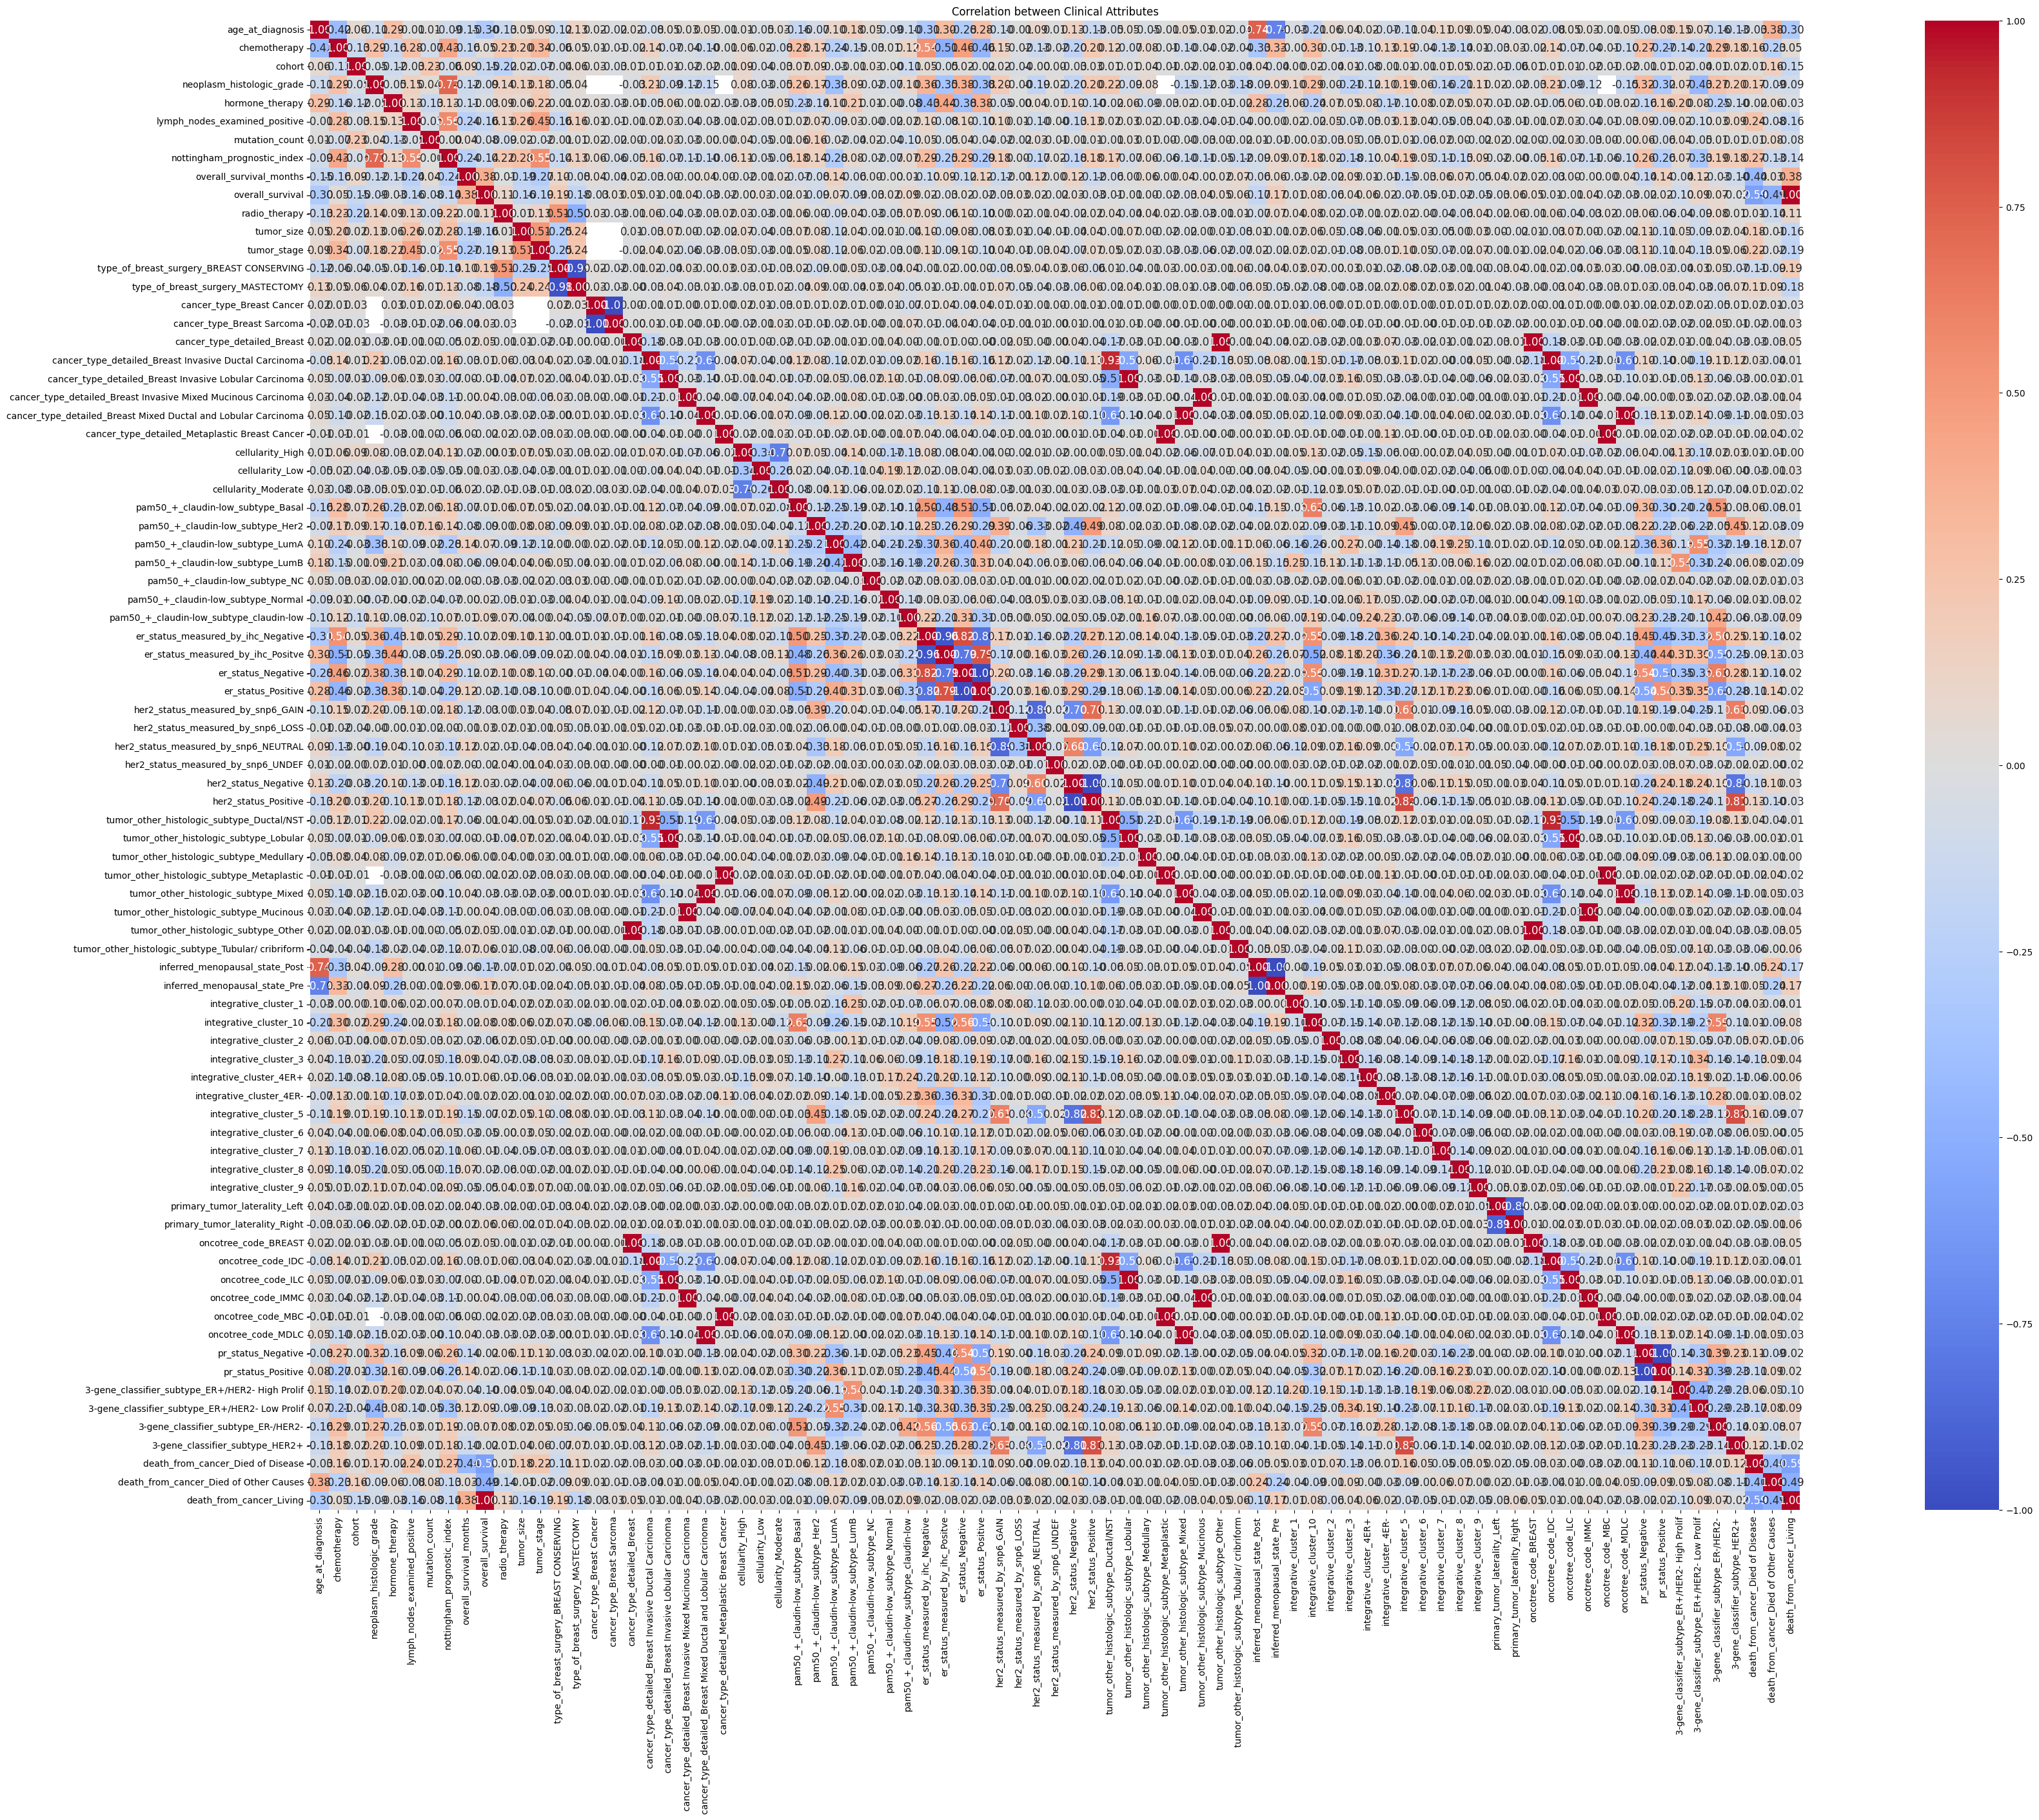

In [500]:
# Calculez la matrice de corrélation
correlation_matrix = combined_data.corr()

# Créez la heatmap de corrélation avec les chiffres de corrélation affichés
fig, axs = plt.subplots(figsize=(50, 30))

# Utilisez annot=True pour afficher les chiffres de corrélation
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, annot_kws={"fontsize": 12})

# Titre de la heatmap
plt.title('Correlation between Clinical Attributes')

plt.show()

> We notice some high correlations between some attributes, which means the clinical attribute really influence the target feature (overall_survival) 

# **Definition du dataset de genetique**

In [501]:
# dropping mutations
genetic_features_to_drop = data.columns[520:]
genetic_data = data.drop(genetic_features_to_drop, axis=1)
# droping clinical data
genetic_features_to_drop = genetic_data.columns[4:35]
genetic_data = genetic_data.drop(genetic_features_to_drop, axis=1)
genetic_data = genetic_data.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
genetic_data = genetic_data.iloc [:,:-174]
genetic_data['overall_survival']= data['overall_survival']

genetic_data.head()

patient_id    tp53     atm    cdh1   chek2     nbn     nf1   stk11   bard1  \
0           0  0.3504  1.1517  0.0348  0.1266 -0.8361 -0.8578 -0.4294 -1.1201   
1           2 -0.0136 -0.2659  1.3594  0.7961  0.5419 -2.6059  0.5120  0.4390   
2           5  0.5141 -0.0803  1.1398  0.4187 -0.4030 -1.1305  0.2362 -0.1721   
3           6  1.6708 -0.8880  1.2491 -1.1889 -0.4174 -0.6165  1.0078 -0.4010   
4           8  0.3484  0.3897  0.9131  0.9356  0.7675 -0.2940 -0.2961  0.6320   

     mlh1  ...  tubb4a  tubb4b  twist1  adgra2    afdn    aff2    agmo  \
0 -0.4844  ... -0.0250 -0.4113  2.8096  2.8014 -0.0004  0.9673  0.3011   
1  1.2266  ... -0.1003  0.7791 -0.2273 -0.4462 -1.9854  0.5022 -0.9526   
2 -1.7910  ...  1.2084 -0.6572  0.1984 -1.0721 -0.9729  0.0515  0.1109   
3 -1.3905  ...  0.3142 -0.4413  0.1932 -1.0215  0.4553 -0.2354  0.4003   
4 -0.3582  ... -0.6606 -1.4697  0.4128 -1.5326 -0.4795  1.0052  0.9739   

    agtr2   ahnak  overall_survival  
0 -0.8436  1.8227                 1  
1 -1.8435  1.6662                 1  
2  0.9874 -0.0154                 0  
3  1.4839  0.3101                 1  
4  0.8825 -0.7598                 0  

[5 rows x 313 columns]

/tmp/ipykernel_28/619203437.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(genetic_data[i][genetic_data['overall_survival']==0], color='g', label = 'survived')
/tmp/ipykernel_28/619203437.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(genetic_data[i][genetic_data['overall_survival']==1

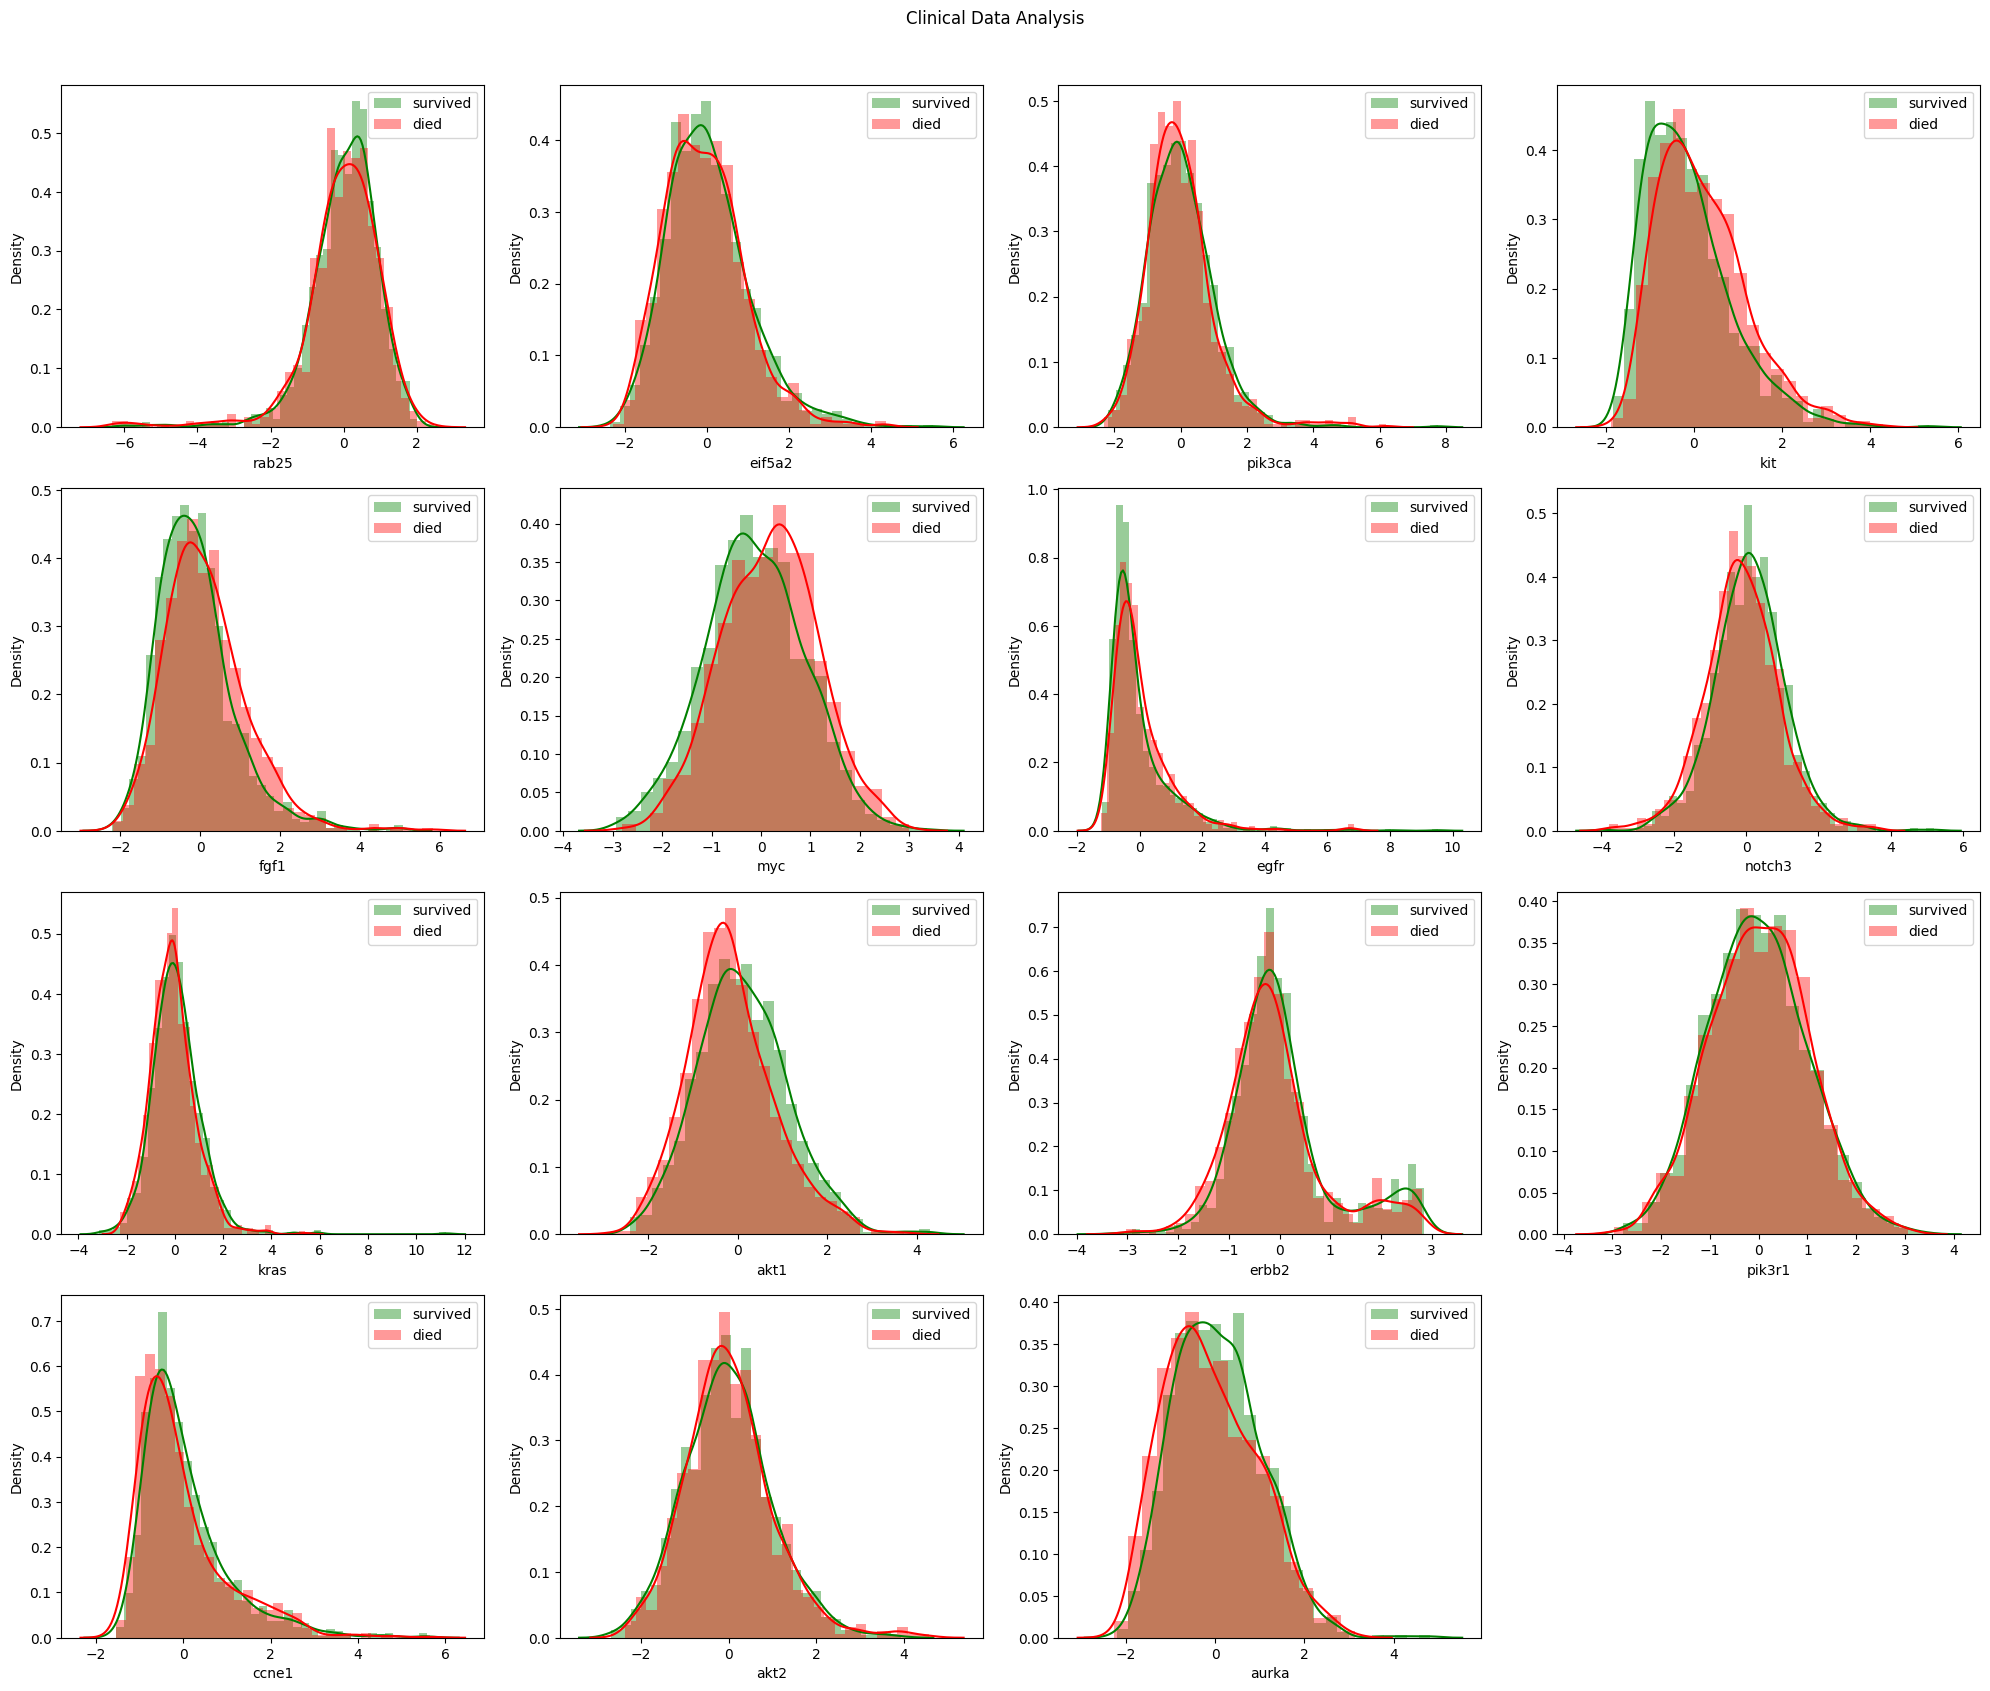

In [502]:
fig = plt.figure(figsize = (20, 25))
j = 0

gene_list = ['rab25', 'eif5a2', 'pik3ca', 'kit', 'fgf1', 'myc', 'egfr', 'notch3', 'kras', 'akt1', 'erbb2', 'pik3r1', 'ccne1', 'akt2', 'aurka']
for i in genetic_data.loc[:,gene_list].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(genetic_data[i][genetic_data['overall_survival']==0], color='g', label = 'survived')
    sns.distplot(genetic_data[i][genetic_data['overall_survival']==1], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

The distribution is close between the two classes

In [503]:
print('Maximum value possible in genetic data:', genetic_data.drop(['patient_id','overall_survival'], axis = 1).max().max())
print('Minimum value possible in genetic data:', genetic_data.drop(['patient_id','overall_survival'], axis = 1).min().min())

Maximum value possible in genetic data: 18.6351
Minimum value possible in genetic data: -6.4387


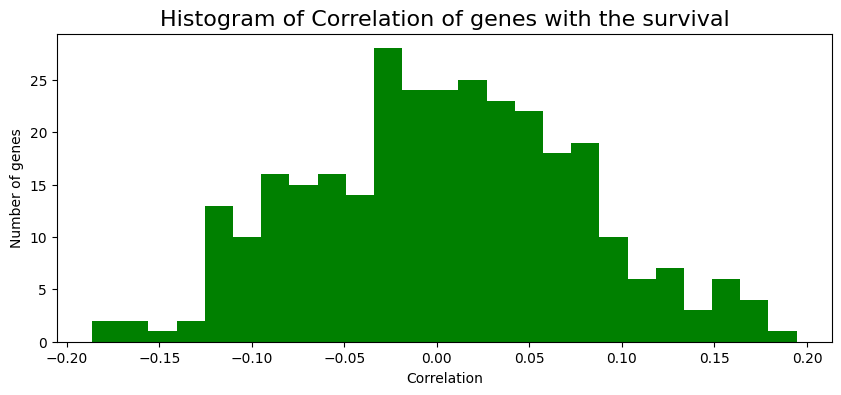

In [504]:
#how varied are genes and how well do they correlate with eventdeath?
fig, ax = plt.subplots(figsize=(10,4))

#plot histogram of variation using standard deviation as a measure
corrs=[]
for col in genetic_data.drop(['patient_id'], axis = 1).columns:
    corr = genetic_data[[col,'overall_survival']].corr()['overall_survival'][col]
    corrs.append(corr)

corrs.pop(-1)
ax.hist(corrs,  bins=25, color = 'green')
ax.set_xlabel("Correlation")
ax.set_ylabel("Number of genes")
ax.set_title("Histogram of Correlation of genes with the survival", size=16)


plt.show()

> **this shows that the correlation is low, most genetic feature don't influence on our target feature a lot**

Definition du dataset de mutation et encodage de ce dernier en 0 et 1 (es ce que le gene existe ou pas en gros on n'utilisse pas le sous type de la mutation)

droping clinical and genetic data

In [505]:
mutation_features_to_drop = data.columns[:520]
mutation_df = data.drop(mutation_features_to_drop, axis=1)

if there is a mutation=1, no-mutation=0

In [506]:
for column in mutation_df.columns[:]:
    mutation_df[column]=pd.to_numeric(mutation_df[column], errors='coerce').fillna(1).astype(int)

mutation_df.insert(loc=1 , column='overall_survival', value=data['overall_survival'])

mutation_df.head()

/tmp/ipykernel_28/1572580545.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mutation_df.insert(loc=1 , column='overall_survival', value=data['overall_survival'])


pik3ca_mut  overall_survival  tp53_mut  muc16_mut  ahnak2_mut  kmt2c_mut  \
0           0                 1         0          0           0          0   
1           0                 1         1          0           0          0   
2           1                 0         0          0           0          0   
3           1                 1         0          0           0          0   
4           0                 0         1          0           0          0   

   syne1_mut  gata3_mut  map3k1_mut  ahnak_mut  ...  mtap_mut  ppp2cb_mut  \
0          0          0           0          0  ...         0           0   
1          0          0           0          0  ...         0           0   
2          0          0           0          0  ...         0           0   
3          0          0           0          0  ...         0           0   
4          0          0           0          0  ...         0           0   

   smarcd1_mut  nras_mut  ndfip1_mut  hras_mut  prps2_mut  smarcb1_mut  \
0            0         0           0         0          0            0   
1            0         0           0         0          0            0   
2            0         0           0         0          0            0   
3            0         0           0         0          0            0   
4            0         0           0         0          0            0   

   stmn2_mut  siah1_mut  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 174 columns]

In [507]:
correlations = {}
for column in mutation_df.columns:
    if column != 'overall_survival':
        correlation = mutation_df[column].corr(mutation_df['overall_survival'])
        correlations[column] = correlation

correlation_series = pd.Series(correlations)
correlation_series = correlation_series.sort_values(ascending=False)
print("Maximum Correlation: " + "%.3f" %max(correlation_series))
print("Minimum Correlation: " + "%.3f" %min(correlation_series))
print("Mean Correlation: " + "%.3f" %np.mean(correlation_series))


Maximum Correlation: 0.105
Minimum Correlation: -0.067
Mean Correlation: -0.012


> La correlation max est trés basse donc on peut completement ne pas considerer ces colonnes du dataset

# **TRAINING PART USING DEEP LEARNING**

On combine les datasets clinical et genitic sans le mutation parceque faible correlation

In [508]:
trn_df = pd.concat([clinical_data, genetic_data], axis=1)

In [509]:
trn_df = trn_df.applymap(int)

In [510]:
trn_dff =trn_df['overall_survival']
trn_dff

0       1
1       1
2       0
3       1
4       0
       ..
1899    1
1900    0
1901    0
1902    0
1903    0
Name: overall_survival, Length: 1904, dtype: int64

# **Splitting the data and the data to predict**

In [511]:
# creating features and label 
X = trn_df.drop('overall_survival', axis = 1)
y = trn_dff #feature target

In [512]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)

# **Creating the sequential model**

In [513]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# Créer un modèle séquentiel
model = Sequential()

# Couche d'entrée
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))

# Couches cachées
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))

# Couche de sortie
model.add(Dense(units=1, activation='sigmoid'))

# Compilation du modèle
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])


In [514]:
X_train

type_of_breast_surgery_BREAST CONSERVING  \
231                                          0   
944                                          0   
1614                                         0   
432                                          0   
579                                          1   
...                                        ...   
835                                          0   
1216                                         0   
1653                                         0   
559                                          1   
684                                          0   

      type_of_breast_surgery_MASTECTOMY  cancer_type_Breast Cancer  \
231                                   1                          1   
944                                   1                          1   
1614                                  1                          1   
432                                   1                          1   
579                                   0                          1   
...                                 ...                        ...   
835                                   1                          1   
1216                                  1                          1   
1653                                  1                          1   
559                                   0                          1   
684                                   1                          1   

      cancer_type_Breast Sarcoma  cancer_type_detailed_Breast  \
231                            0                            0   
944                            0                            0   
1614                           0                            0   
432                            0                            0   
579                            0                            0   
...                          ...                          ...   
835                            0                            0   
1216                           0                            0   
1653                           0                            0   
559                            0                            0   
684                            0                            0   

      cancer_type_detailed_Breast Invasive Ductal Carcinoma  \
231                                                   0       
944                                                   1       
1614                                                  0       
432                                                   1       
579                                                   1       
...                                                 ...       
835                                                   1       
1216                                                  0       
1653                                                  1       
559                                                   1       
684                                                   1       

      cancer_type_detailed_Breast Invasive Lobular Carcinoma  \
231                                                   0        
944                                                   0        
1614                                                  0        
432                                                   0        
579                                                   0        
...                                                 ...        
835                                                   0        
1216                                                  0        
1653                                                  0        
559                                                   0        
684                                                   0        

      cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma  \
231                                                   0               
944                                                   0               
1614                                        

**Training the model**

In [515]:
history = model.fit(X_train, y_train, verbose=1, epochs=80, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/80
21/21 [==============================] - 2s 13ms/step - loss: 25.5148 - accuracy: 0.5586 - val_loss: 8.9504 - val_accuracy: 0.4003
Epoch 2/80
21/21 [==============================] - 0s 6ms/step - loss: 8.6136 - accuracy: 0.5413 - val_loss: 2.2184 - val_accuracy: 0.4073
Epoch 3/80
21/21 [==============================] - 0s 6ms/step - loss: 1.6462 - accuracy: 0.5721 - val_loss: 0.7821 - val_accuracy: 0.5227
Epoch 4/80
21/21 [==============================] - 0s 6ms/step - loss: 0.8684 - accuracy: 0.6456 - val_loss: 2.1597 - val_accuracy: 0.6538
Epoch 5/80
21/21 [==============================] - 0s 8ms/step - loss: 1.5937 - accuracy: 0.5976 - val_loss: 0.6190 - val_accuracy: 0.6591
Epoch 6/80
21/21 [==============================] - 0s 9ms/step - loss: 1.5331 - accuracy: 0.6201 - val_loss: 1.3560 - val_accuracy: 0.6661
Epoch 7/80
21/21 [==============================] - 0s 10ms/step - loss: 1.5378 - accuracy: 0.6231 - val_loss: 0.7811 - val_accuracy: 0.6801
Epoch 8/80
21/21 

In [516]:
loss, accuracy = model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.9248


In [517]:
print(loss)

print(accuracy)

0.2629753649234772
0.9248251914978027


# **Model Accuracy**

In [518]:

print(round(accuracy, 5))


0.92483


# **Validation Accuracy Graph**

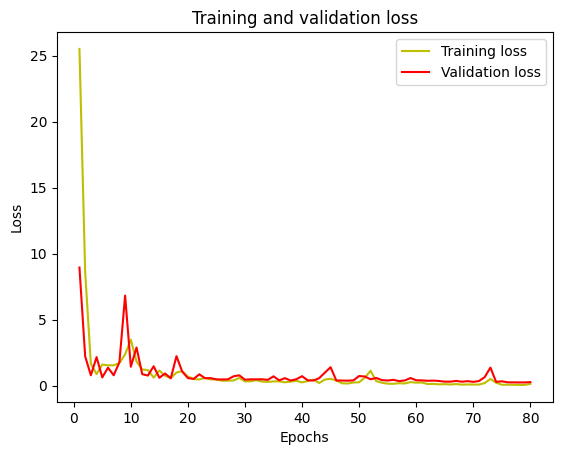

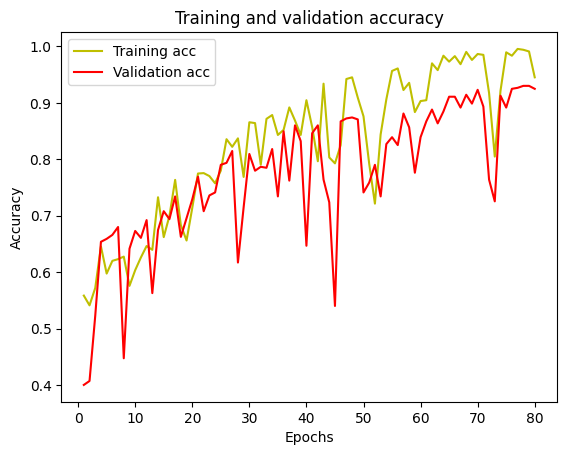

In [519]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Machine learning for clinical and genetic dataset**

In [529]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rnd = KNeighborsClassifier()
rnd.fit(X_train, y_train)
acc = rnd.score(X_test,y_test)
acc

0.8671328671328671

In [530]:
print(round(acc, 5))

0.86713


# **DEEP Learning only with clinical features**

In [531]:
# creating features and label 
X = clinical_data
y = trn_dff

In [534]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)

In [535]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# Créer un modèle séquentiel
modelc = Sequential()

# Couche d'entrée
modelc.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))

# Couches cachées
modelc.add(Dense(units=32, activation='relu'))

# Couche de sortie
modelc.add(Dense(units=1, activation='sigmoid'))

# Compilation du modèle
modelc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [536]:
history = modelc.fit(X_train, y_train, verbose=1, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
42/42 [==============================] - 1s 8ms/step - loss: 0.6379 - accuracy: 0.6854 - val_loss: 0.5077 - val_accuracy: 0.9038
Epoch 2/20
42/42 [==============================] - 0s 5ms/step - loss: 0.3605 - accuracy: 0.9587 - val_loss: 0.2189 - val_accuracy: 0.9860
Epoch 3/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1225 - accuracy: 0.9985 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 4/20
42/42 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 5/20
42/42 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 6/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 7/20
42/42 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 8/20
42/42 [==

> **Overfitting case**

In [526]:
loss, accuracy = modelc.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 4.5139e-04 - accuracy: 1.0000


# **Machine learning on the clinical features only**

In [527]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rnd = KNeighborsClassifier()
rnd.fit(X_train, y_train)
acc1 = rnd.score(X_test,y_test)
acc1

0.9003496503496503

In [528]:
print(round(acc1,5))

0.90035


# **Conclusion**

*The sequential model (deep learning), performs better on the model that has the dataset of both clinical and genetic features,however using the clinical features the sequential mode overfits.
The K-neighbors model performs better on the clinical model.* 

**The best accuracy was obtained by the DL model on the (clinical+genetic) dataset.**, **0.92483**
